Projekt PRiAD Testy

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [3]:
df = pd.read_csv("UniversalBank.csv")
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          10      81     90089       3   0.60          2   
9       10   34           9     180     93023       1   8.90          3   
10      11   65          39     105     94710       4   2.40          3   
11      12   29           5      45     90277       3   0.10          2   
12      13   48          

In [4]:
liczbaBrakujacychElementow = df.isnull().sum().sum()
print(f"Liczba brakujących elementów: {liczbaBrakujacychElementow}")

Liczba brakujących elementów: 0


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
#Liczba obiektów
df.shape[0]

5000

In [8]:
#liczba atrybutów - wyznaczamy personal loan - id nie uwzględniamy bo nie powinno mieć wpływu na wynik pożyczki
df.columns.size

14

In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.info()
#prawie wszystkie dane typu int, jedynie ccavg typu float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Wnioski z analizy podstawowych parametrów danych:

1. Wszystkie dane w zbiorze są typu liczbowego. Ułatwi to późniejszą analizę zbioru.
2. Kredyt jest udzielany jedynie 9.6% wszystkich osób w zbiorze.
3. 

In [11]:
#Wypisanie ramki danych
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [12]:
#ID niepotrzebna dana, można wyrzucić
df = df.drop(columns=['ID'])

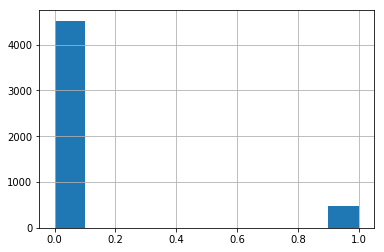

In [13]:
df['Personal Loan'].hist()

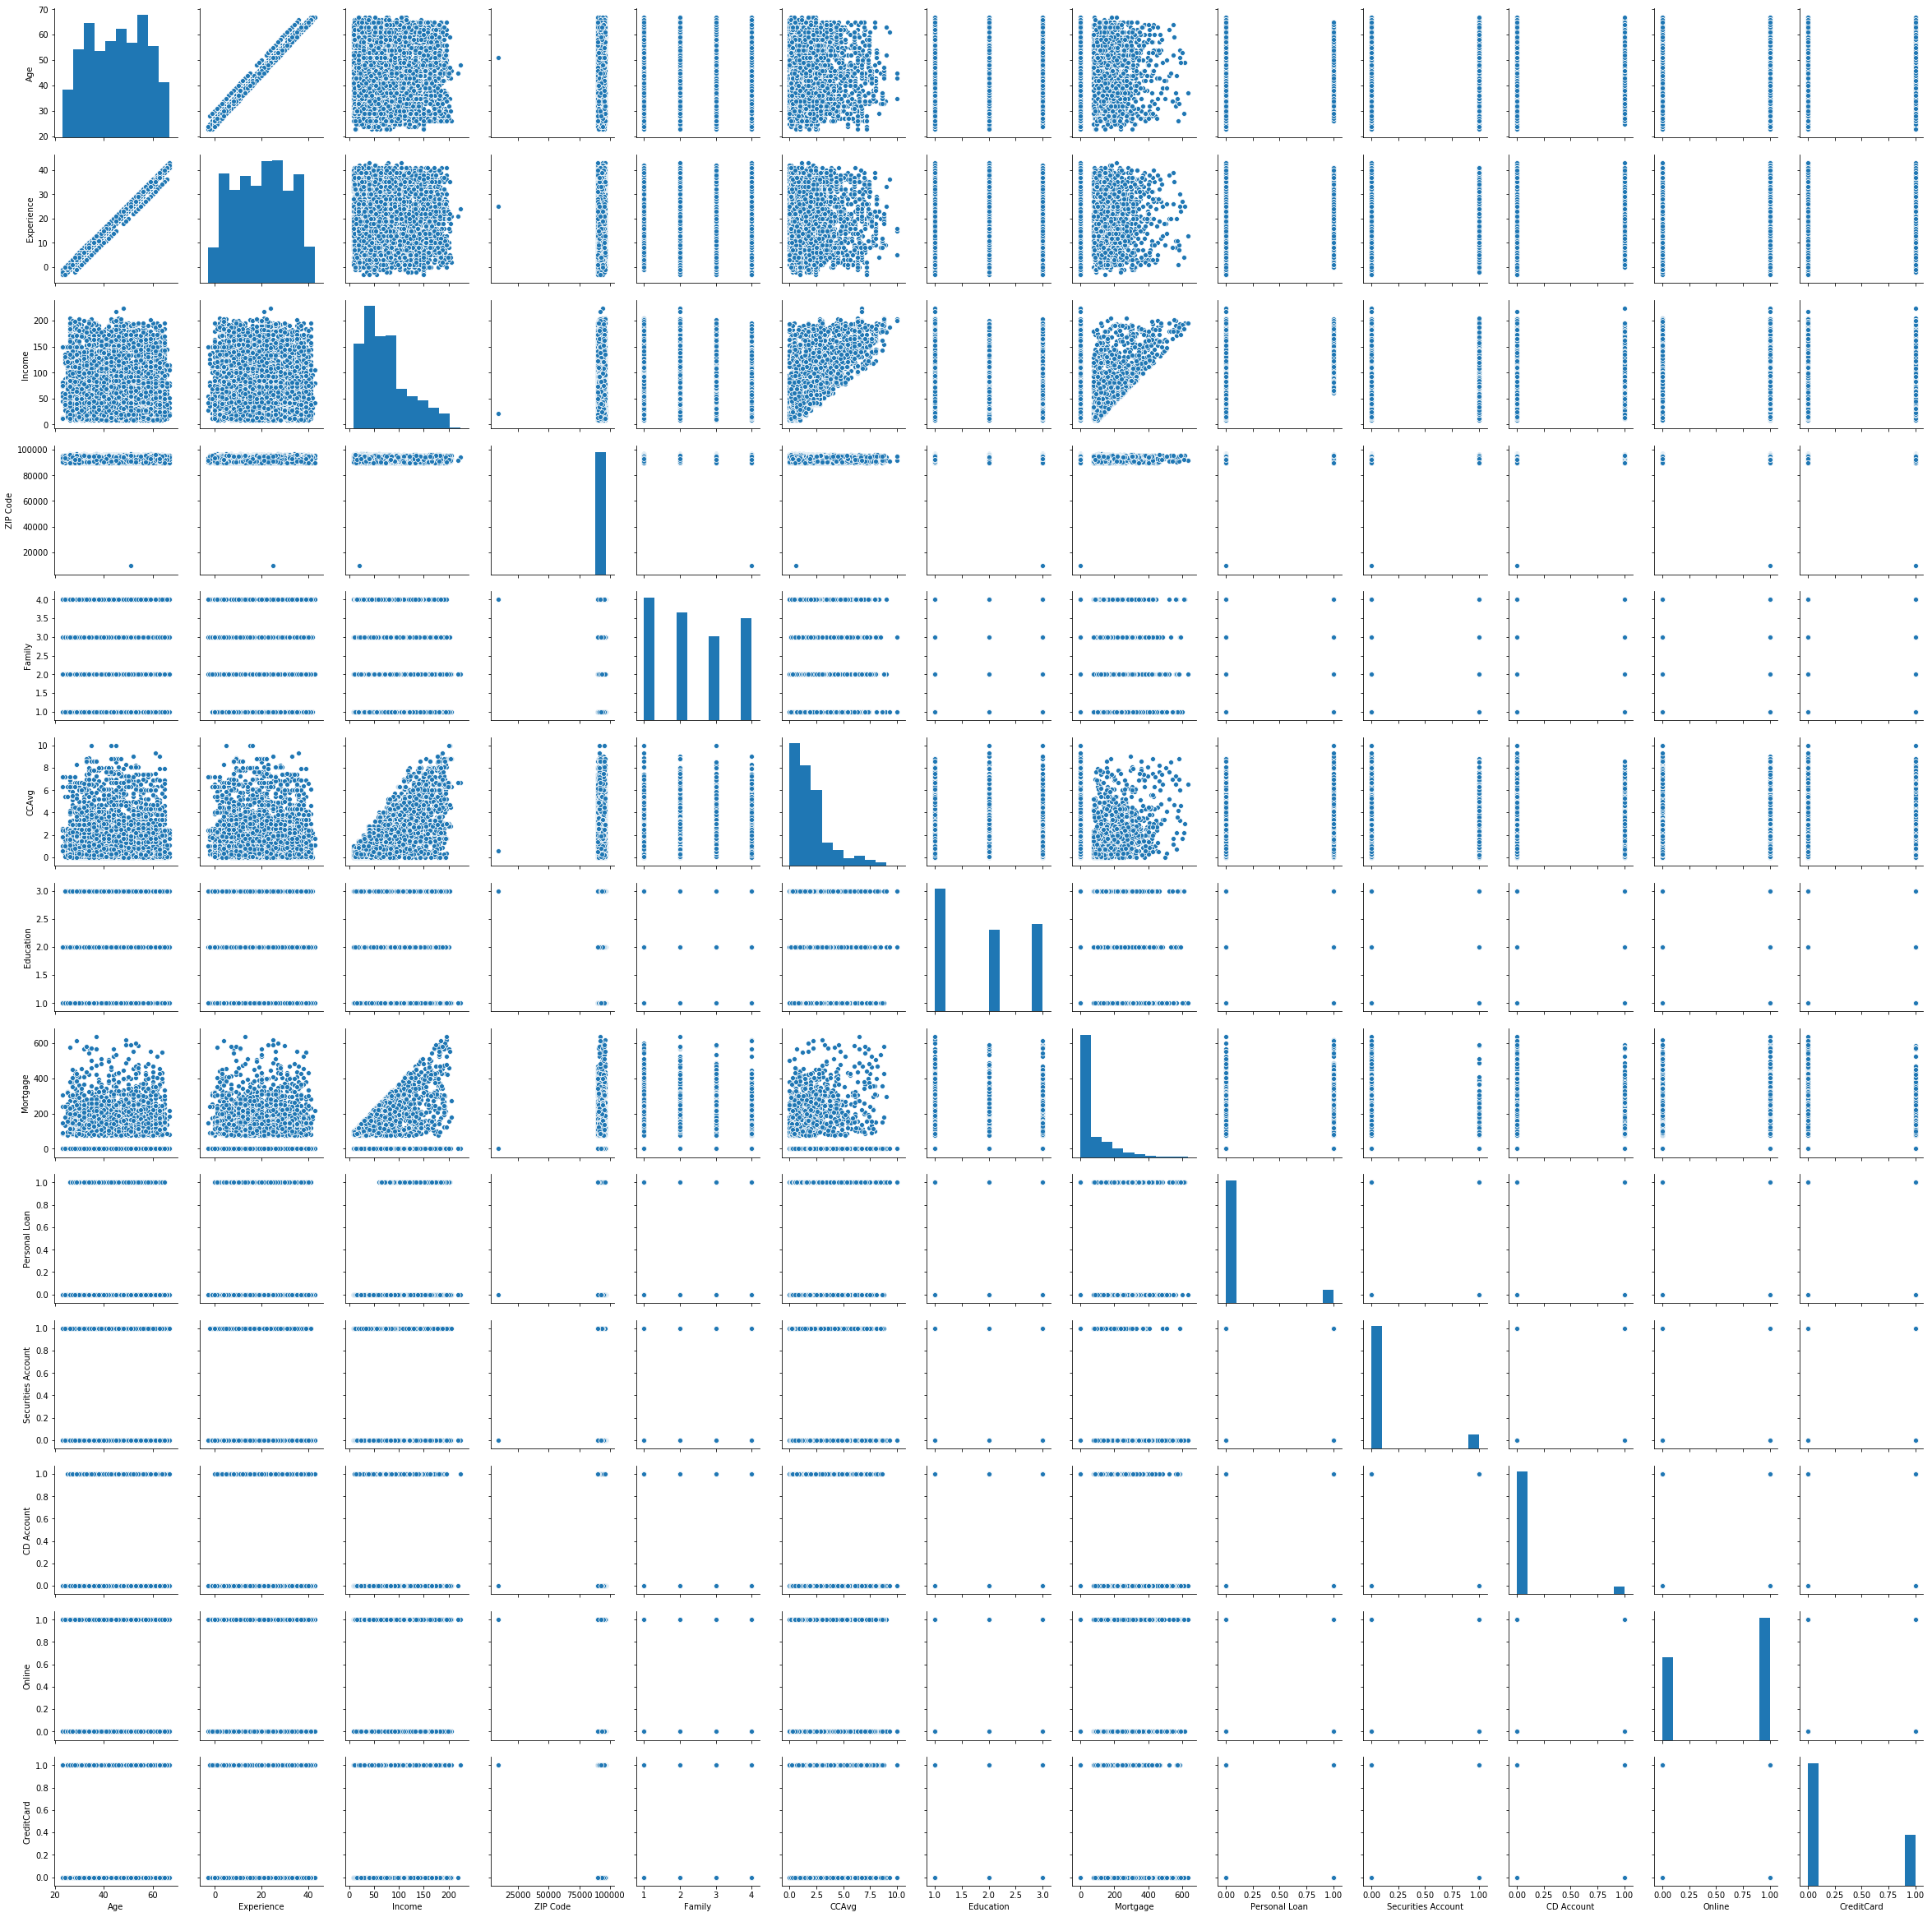

In [14]:
sns.pairplot(df, kind="scatter")
plt.show()

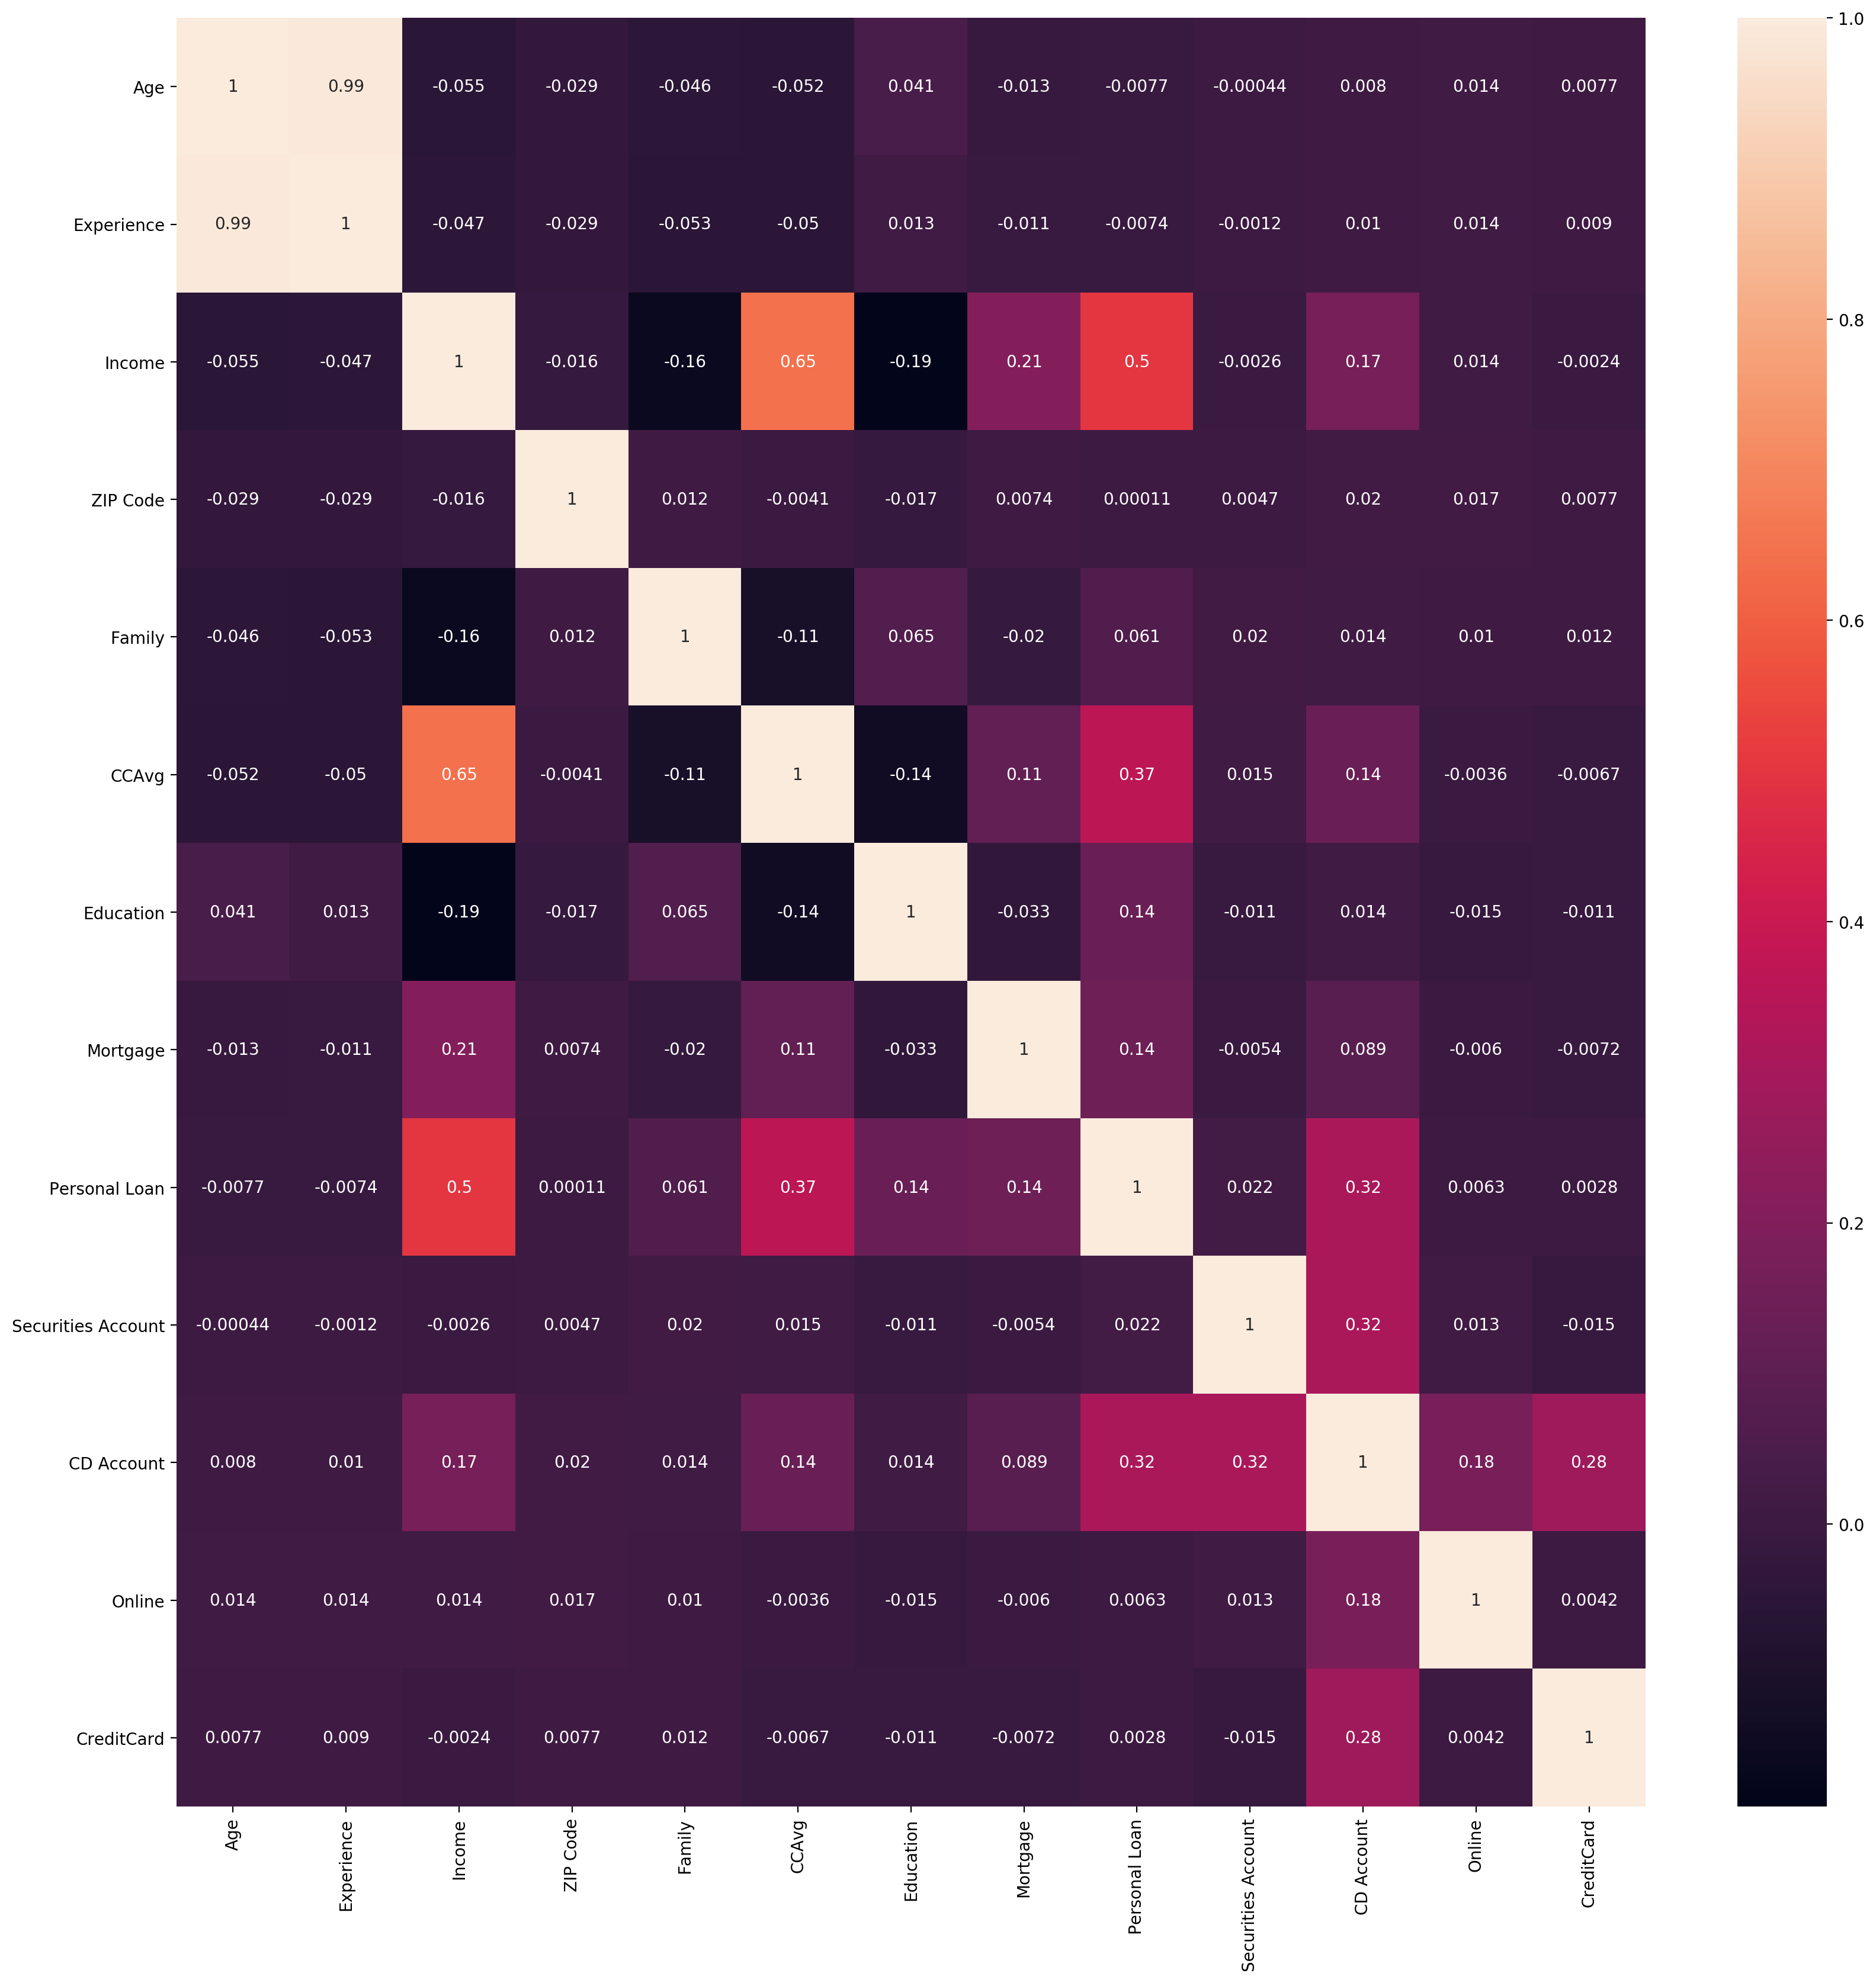

In [15]:
#Korelacja:
plt.figure(figsize=(20,20), dpi = 200)
sns.heatmap(df.corr(), annot = df.corr())

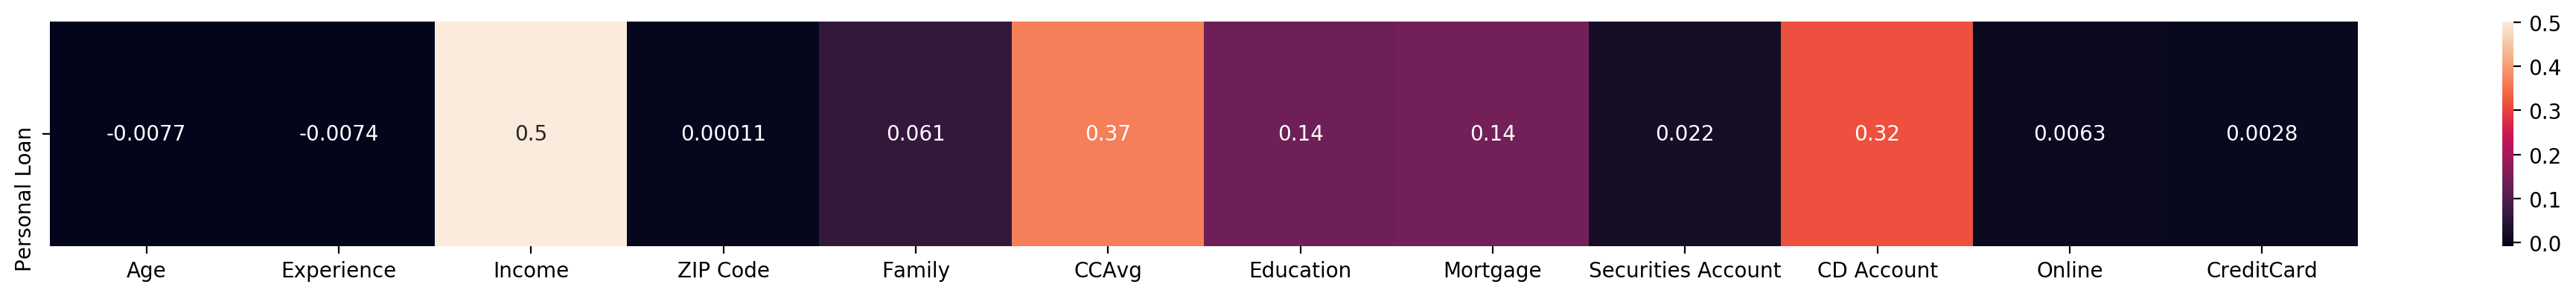

In [16]:
#korelacja atrybutów z przyznaniem pożyczki
loanCorrelation = df.corr().iloc[8:9 , 0:]

loanCorrelation = loanCorrelation.drop(columns=['Personal Loan'])
plt.figure(figsize = (25, 2), dpi = 200)
sns.heatmap(loanCorrelation, annot = loanCorrelation)

In [17]:
sortedLoanCorrelation = loanCorrelation.mean()
sortedLoanCorrelation = sortedLoanCorrelation.sort_values(ascending = False)
sortedLoanCorrelation = pd.DataFrame(sortedLoanCorrelation, columns=['Korelacja atrybutów z przydzieleniem kredytu'])

sortedLoanCorrelation

,Korelacja atrybutów z przydzieleniem kredytu
Income,0.502462
CCAvg,0.366889
CD Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities Account,0.021954
Online,0.006278
CreditCard,0.002802
ZIP Code,0.000107


In [32]:
#Atrybuty znaczące: Income, CCAvg, CD Account, Mortgage, Education, Family(?!)
atrZ = list(list(sortedLoanCorrelation.index[:5]))
dfSkrocone = df[atrZ + [df.columns[9]]]

In [33]:
#Testy klasyfikatorów

In [34]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}


def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    display(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    display(pd.crosstab(dane["dec_test"],wynik_test)) 

In [35]:
dane = podziel(dfSkrocone,0.2)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))


Liczba obiektów zbioru uczącego:  4000
Liczba obiektów zbioru testowego:  1000


In [36]:
model = GaussianNB()

weryfikuj(model, dane, range(len(atrZ)))

Macierz pomyłek dla zbioru uczącego


col_0,0,1
row_0,,
0,3450,123
1,312,115


Macierz pomyłek dla zbioru testowego


col_0,0,1
row_0,,
0,873,32
1,63,32
